In [211]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.preprocessing import StandardScaler

In [212]:
df=pd.read_csv("wbc_csv.csv")
df.drop(['id'],axis=1,inplace=True)
df=df.iloc[:,0:31]

In [213]:
print(df.shape)
df.info()
df.describe()

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se         

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [214]:
df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# One Hot Encoding

In [215]:
from sklearn.preprocessing import OneHotEncoder
df['diagnosis']=df['diagnosis'].astype('category')
df['diagnosistics']=df['diagnosis'].cat.codes
enc=OneHotEncoder()
enc_df=pd.DataFrame(enc.fit_transform(df[['diagnosistics']]).toarray())


In [216]:
y=df['diagnosis']
x=df.drop(labels=['diagnosis','diagnosistics'], axis=1)


In [217]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# Variance Threshold & CHI sq

In [218]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(scaled_df)
x.columns[var_thres.get_support()]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [316]:
#Variance Threshold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.3,stratify=y,random_state=50)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [220]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)
sum(var_thres.get_support())
# Finding non constant features

30

In [221]:
# constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
# print(len(constant_columns))


# Regression

In [222]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score



In [317]:
# Train-test split for 'mean' features
X_train, X_test, y_train, y_test = train_test_split(
    df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']],
    df.diagnosistics, test_size=0.2, random_state=42)

In [224]:
#Mean Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [225]:
# Assuming X_test has the same features as X_train but possibly in a different order
X_test_reordered = X_test[X_train.columns]

# Predictions for 'mean' features
y_pred_binary_mean = (reg.predict(X_test_reordered) >= 0.5).astype(int)


In [226]:
reg.predict([[13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389]])
#if 0.5> B and if 0.5<  M
#10th row

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.77062805])

In [227]:
cm_mean = confusion_matrix(y_test, y_pred_binary_mean)
accuracy_mean = accuracy_score(y_test, y_pred_binary_mean)
print("Confusion Matrix (Mean Features):")
print(cm_mean)
print("Accuracy (Mean Features):", accuracy_mean)

Confusion Matrix (Mean Features):
[[67  4]
 [ 4 39]]
Accuracy (Mean Features): 0.9298245614035088


In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']],
    df.diagnosistics, test_size=0.2, random_state=42)

In [229]:
reg.fit(X_train, y_train)
y_pred_binary_se = (reg.predict(X_test) >= 0.5).astype(int)


In [230]:
reg.predict([[0.8068,0.9017,5.455,102.6,0.006048,0.01882,0.02741,0.0113,0.01468,0.002801]])
#if 0.5> B and if 0.5<  M
#26th row

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.77433124])

In [231]:
cm_se = confusion_matrix(y_test, y_pred_binary_se)
accuracy_se = accuracy_score(y_test, y_pred_binary_se)
print("\nConfusion Matrix (SE Features):")
print(cm_se)
print("Accuracy (SE Features):", accuracy_se)


Confusion Matrix (SE Features):
[[68  3]
 [14 29]]
Accuracy (SE Features): 0.8508771929824561


In [232]:
# Train-test split for 'worst' features
X_train, X_test, y_train, y_test = train_test_split(
    df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']],
    df.diagnosistics, test_size=0.2, random_state=42)


In [233]:

# Linear Regression for 'worst' features
reg.fit(X_train, y_train)
y_pred_binary_worst = (reg.predict(X_test) >= 0.5).astype(int)


In [234]:
reg.predict([[14.67,23.19,96.08,656.7,0.1089,0.1582,0.105,0.08586,0.2346,0.08025]])
#if 0.5> B and if 0.5<  M
#53rd row

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.14219081])

In [235]:
cm_worst = confusion_matrix(y_test, y_pred_binary_worst)
accuracy_worst = accuracy_score(y_test, y_pred_binary_worst)
print("\nConfusion Matrix (Worst Features):")
print(cm_worst)
print("Accuracy (Worst Features):", accuracy_worst)


Confusion Matrix (Worst Features):
[[70  1]
 [ 3 40]]
Accuracy (Worst Features): 0.9649122807017544


#Logistic Regression

  

In [236]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [237]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [238]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.3,stratify=y,random_state=50)


In [239]:
#logistic regression on heart.csv
model=LogisticRegression(max_iter=600)
model.fit(X_train,y_train)
test_data_prediction=model.predict(X_test)




In [240]:
accuracy=accuracy_score(y_test,test_data_prediction)
print(" Accuracy of =",model,'=',accuracy)

 Accuracy of = LogisticRegression(max_iter=600) = 0.9590643274853801


In [241]:
input_data=(13.8,15.79,90.43,584.1,0.1007,0.128,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.0122,0.00313,16.57,20.86,110.3,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.103)
input_data_array = np.asarray(input_data)
reshaped = input_data_array.reshape(1, -1)

In [242]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_data_prediction)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[107   0]
 [  7  57]]


Text(120.72222222222221, 0.5, 'Truth')

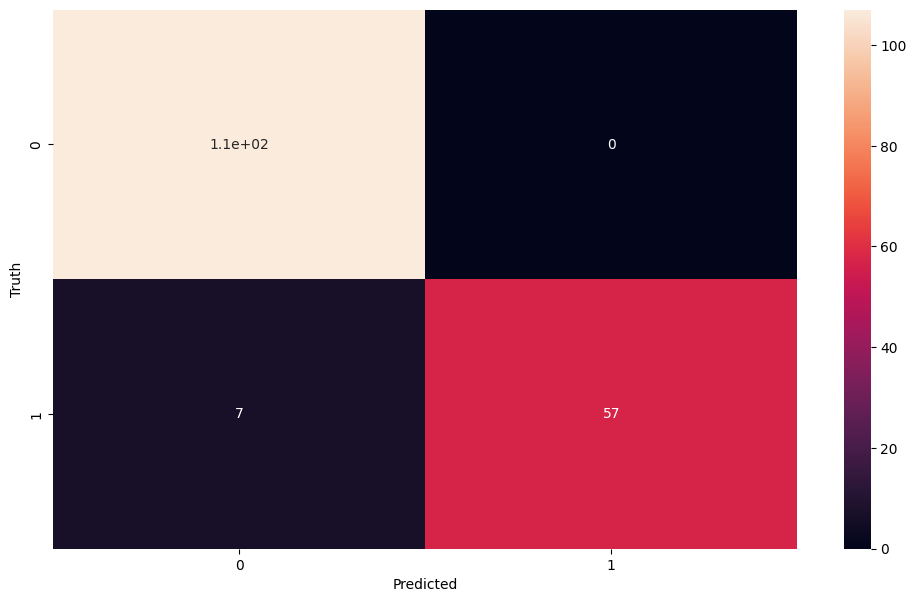

In [243]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [245]:
import math
math.sqrt(len(y_test))

13.076696830622021

In [246]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# Define the model: Init K-NN

In [247]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.3,stratify=y,random_state=55)


In [248]:
classifier.fit(X_train, y_train)
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B'], dtype=object)

In [249]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)


[[107   0]
 [  4  60]]


In [250]:
#sc = StandardScaler()
#y_train = sc.fit_transform(y_train)
#y_test = sc.transform(y_test)

In [251]:
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred))

0.9766081871345029


Text(120.72222222222221, 0.5, 'Truth')

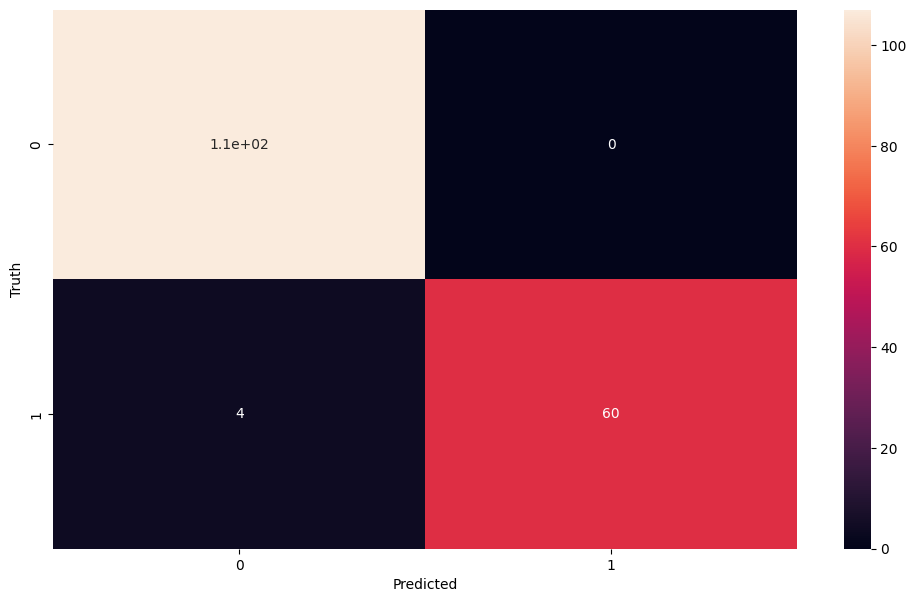

In [252]:

plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SVM

In [253]:
from sklearn.svm import SVC

In [254]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.25,stratify=y,random_state=50)


In [255]:
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
#Check for SVM accuracy
y_pred = clf_linear.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9790209790209791


In [256]:
cm = confusion_matrix(y_test, y_pred )
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[90  0]
 [ 3 50]]


Text(120.72222222222221, 0.5, 'Truth')

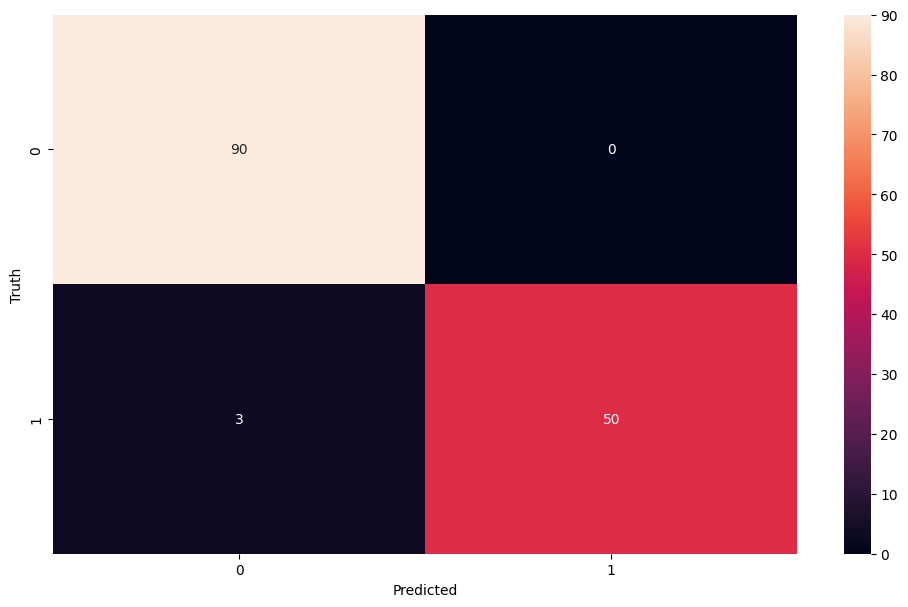

In [257]:

plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# DecisionTree



In [258]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [259]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.15,stratify=y,random_state=50)


In [260]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [262]:
# model.score(inputs_n,target)

In [263]:
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


In [264]:
model.predict([[2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]])

array(['M'], dtype=object)

In [265]:
model.predict([[1,1,5,2,1,6,3,1,8,2,1,7,4,1,8,2,1,8,2,7,3,2,1,4,2,1,5,2,1,3]])

array(['M'], dtype=object)

In [266]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9534883720930233


In [267]:
cm = confusion_matrix(y_test, y_pred )
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[54  0]
 [ 4 28]]


Text(120.72222222222221, 0.5, 'Truth')

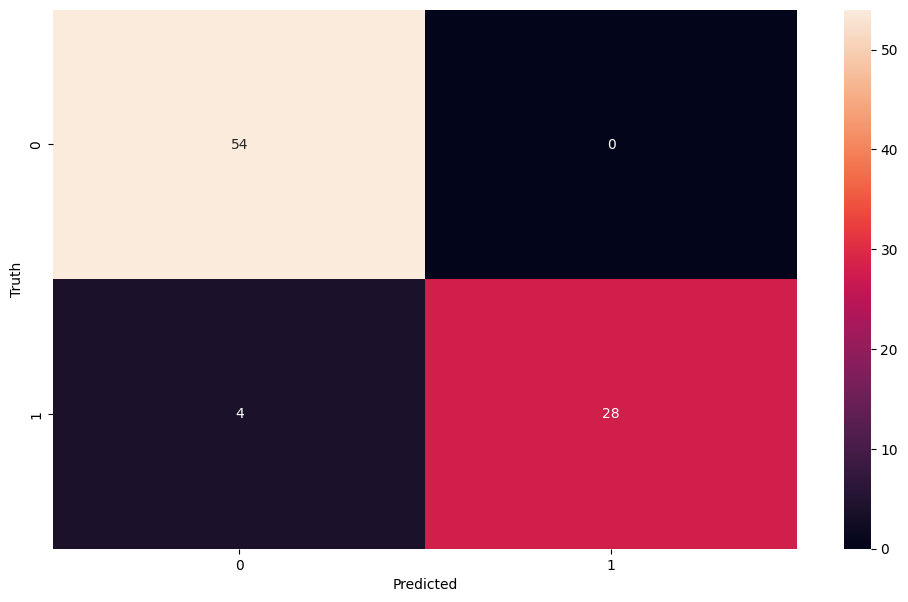

In [268]:
# import matplotlib.pyplot as plt
# import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# RandomForest

In [269]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)


In [270]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size=0.25,stratify=y,random_state=42)


In [271]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.951048951048951

In [272]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.951048951048951


In [273]:
conf_matrix = confusion_matrix(y_test, y_pred )
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[90  0]
 [ 7 46]]


Text(120.72222222222221, 0.5, 'Truth')

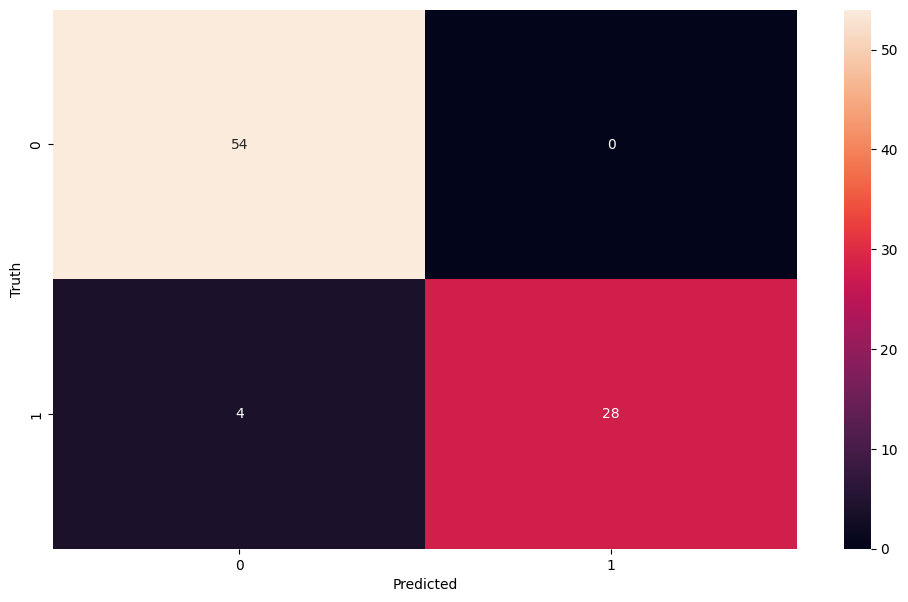

In [274]:

plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#ANN Artificial Neural Networks

In [309]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [331]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.15, stratify=y, random_state=26)


In [333]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [321]:
#Initialising ANN
ann = tf.keras.models.Sequential()


In [322]:
#Adding  Hidden Layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))


In [323]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


In [324]:
#Fitting ANN
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)


Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.8389 - accuracy: 0.3868
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.4022
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.4088
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.4396
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.4769
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.5560
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.6396
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7319
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8132
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8637
Epoch 11/

In [325]:
ann.evaluate(X_test,y_test,batch_size=32)

4/4 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9649


[0.0871346965432167, 0.9649122953414917]

In [326]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9649
Test Loss: 0.0871346965432167
Test Accuracy: 0.9649122953414917


In [327]:
y_pred_probs = ann.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [328]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (using sklearn): {test_accuracy}")

Test Accuracy (using sklearn): 0.9649122807017544


In [329]:
conf_matrix = confusion_matrix(y_test, y_pred )
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[70  1]
 [ 3 40]]


Text(120.72222222222221, 0.5, 'Truth')

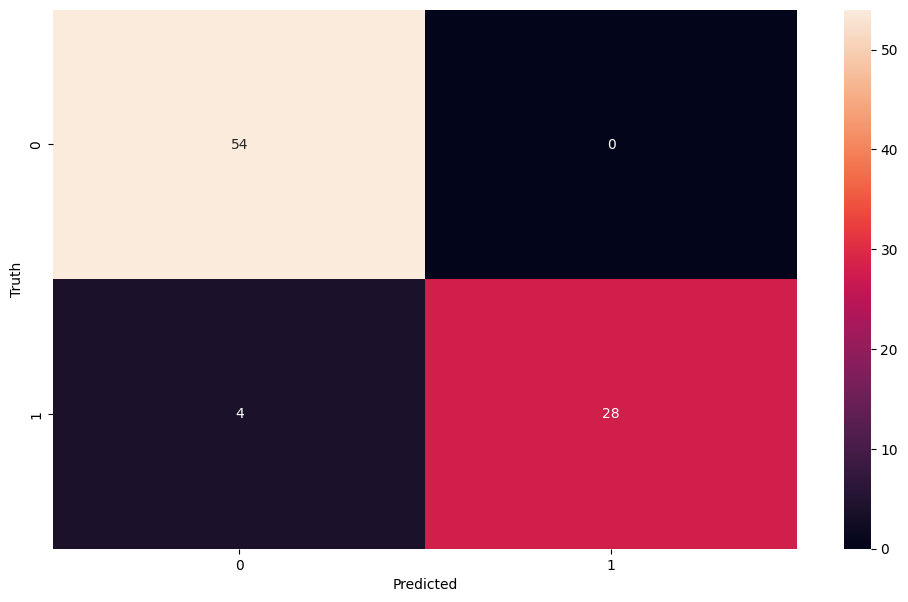

In [330]:
# import matplotlib.pyplot as plt
# import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')